# Working with Digital Herbarium using Python

[Python](http://python.org) programming language is a popular tool for speaking with a computer. It is a common purpose programming language widely used not only in programming field, but also in scientific computations, data analysis and engineering.

Among reasons of Python popularity are its programming productivity, code readability, obvious simplicity, as well as dynamic typing, supporting [OOPs](https://en.wikipedia.org/wiki/Object-oriented_programming) coding style, cross-platform runability etc.

When writing in Python, there is almost no chance to get unreadable code. Every block of the program is separated from others by predefined number of spaces that leads to an easy-to-read textual document. There are recommendations on how to write Python code - [pep8](https://www.python.org/dev/peps/pep-0008/). Pep8 document aims to help user write readable and easy understandable Python code.

Reproducing computations presented below assumes Python 3.5+ to be installed on your operational system, as well as some Python packages (e.g. [Pandas](http://pandas.pydata.org), [NumPy](http://numpy.org) etc.); 
To work with spatially distributed data, you will need additionally to install `pyshp`  (a tool for I/O operations with ESRI shape files) and `shapely` (geometry primitives and interactions) packages.

Windows users can start with [Anaconda](https://www.continuum.io/downloads) distribution. This distribution was designed to provide a convenient toolset for scientific computations and data analysis on top of Python, so it could be a good starting point on the way of building computational environment for your investigations.

Executable lines of code are given in `In[xxx]`-started blocks; these blocks could be executed either in [Jupyter](http://jupyter.org/) interactive environment or by coping them into a separate text file (with `.py` extension) and running with Python interpreter.

This document is created using [Jupyter](http://jupyter.org/) software, interactive environment that allows mixing code and text in pretty-styled way.

## Making simple queries

To get started, we need to prepare computational environment. The most important component of it is the [Pandas](http://pandas.pydata.org) package; It is highly recommended to install it before doing any manipulation with data. Being  installed, Pandas supplies us with a good and convenient data container -- the DataFrame class, that, in turn, allows to make sophisticated data selection and perform basic input and output (IO) operations.

We assume that the Pandas has been already installed. So, let's import it.

In [1]:
import pandas as pd  # This is an implicit agreement: everytime you need pandas, it is better to import it as `pd`.

Let's define variable called `HERBARIUM_SEARCH_URL`. This variable will point to the URI, where we will send HTTP search queries. This URI is assumed to be a permanent address, so it probably wouldn't be changed in the nearest future.

Note: Оne can use HTTPS protocol instead. In this case just replace `http` with `https` in `HERBARIUM_SEARCH_URL`.

In [2]:
HERBARIUM_SEARCH_URL = 'http://botsad.ru/hitem/json/'

It is worth noting that variable's naming is a very important part of any programming process. One can think that it isn't so important, and would use shorthand notations instead, bearing in mind that everything will be clear, at least, for themselves. But this isn't a good reason to do so, even if you are writing code just for yourself. Best practice in this case assumes to choose variable names that will be clear for everyone (in an intuitive way) - on the one hand, and that will be as short as possible - on the other.

Let us organize search parameters in a list of tuples, as follows
(to get full description of all available search parameters follow the [link](http://botsad.ru/herbarium/docs/en/http_api.html)):

In [3]:
search_parameters_set = (('collectedby', 'Bakalin'),
                         ('identifiedby', 'Bakalin'),
                         ('colstart', '2016-01-01'),
                         ('colend', '2016-12-30')
                         )

Let's import a set of necessary functions to make HTTP-requests automatically. Python's ecosystem provides a lot of tools to do this: one can use third party packages, or just use ones included in the Python standard distributive (a.k.a "battarie included" pack).

In [4]:
try:
    # Python 3.x
    from urllib.parse import quote
    from urllib.request import urlopen
except ImportError:
    # Python 2.x
    from urllib import quote
    from urllib import urlopen

Now, we can use defined variables to compose search URI (according to HTTP-API [rules](http://botsad.ru/herbarium/docs/en/http_api.html)):

In [5]:
search_request_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), search_parameters_set))

According to the [URI specification](https://tools.ietf.org/html/rfc3986#page-11) non-ASCII characters used in the URI should be encoded using symbol '%'. So, if your query includes non-ASCII chars, you will need to use helper function `quote` to do such encoding.

In case of simple queries, one can assign `search_request_url` directly, e.g.:
```python
search_request_url = http://botsad.ru/hitem/json?collectedby=bakalin
```

Choosing this way is up to you, but scripting best practice assumes that you will divide process of building the `search_request_url`. Using `search_parameters_set` allows you to be more structured and organized in case of, for instance, making complicated searching queries, performing a set of consequent queries with different parameters etc.: 

```python
list_of_search_pars = [search_parameters_set1, search_parameters_set2, search_parameters_set3,]

list_of_search_urls = [search_request_url1, search_request_url2, search_request_url3, ]
```

For the sake of self-checking, one can print out the current value of the `search_request_url`. 

In [6]:
search_request_url

'http://botsad.ru/hitem/json/?collectedby=Bakalin&identifiedby=Bakalin&colstart=2016-01-01&colend=2016-12-30'

Now we are ready to make searching request to the server. In general,  data loading and its transformation into Python dictionary consist of the following four lines of code:

In [7]:
import json
server_response = urlopen(search_request_url)
data = json.loads(server_response.read().decode('utf-8'))
server_response.close()

So, the variable `data` stores Python dictionary with fields defined in [official docs](https://github.com/VBGI/herbs/blob/master/herbs/docs/httpapi/en/http_api.rst).

Getting started the data processing, one should check `errors` and `warnings` fields; if everything went fine, these variables are leaved empty, or just `warnings` is non-empty.

In [8]:
data['errors'], data['warnings']

([], [])

Therefore, data was successfully loaded, and we can start typical data evaluation process using [Pandas](http://pandas.pydata.org/).

In [9]:
print("The number of obtained records is ", len(data['data']))

The number of obtained records is  179


Now, `data['data']` is a Python dictionary; Python dictionaries are convenient containers for structured data, but Pandas DataFrame is more appropriate for this purpose.
Let us convert the dictionary to the DataFrame object; it is quite simple:

In [10]:
search_df = pd.DataFrame(data['data'])

`search_df` is an instance of the DataFrame class, that has a lot of helper methods to get information about the data. Some of them are `.info()` and `.describe()` methods; they are used to get common information about the data.

In [11]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 41 columns):
acronym                     179 non-null object
additionals                 179 non-null object
altitude                    179 non-null object
branch                      179 non-null object
collection_finished         179 non-null object
collection_started          179 non-null object
collectors                  179 non-null object
country                     179 non-null object
country_id                  177 non-null float64
created                     179 non-null object
details                     179 non-null object
dethistory                  179 non-null object
devstage                    179 non-null object
district                    179 non-null object
family                      179 non-null object
family_authorship           179 non-null object
fieldid                     179 non-null object
genus                       179 non-null object
genus_authorship            17

Also, one can inspect the DataFrame's content:

In [12]:
search_df

,acronym,additionals,altitude,branch,collection_finished,collection_started,collectors,country,country_id,created,...,note,region,short_note,significance,species_authorship,species_epithet,species_fullname,species_id,species_status,updated
0,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"SaPa, Phan Xi Pan National Park.",Lao Cai Province,,,(Austin) Stephani,subciliata,Pallavicinia subciliata (Austin) Stephani,420693,Approved,2017-06-13
1,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"SaPa, Phan Xi Pan National Park[Vietnam]",Lao Cai Province,,,(Austin) Stephani,subciliata,Pallavicinia subciliata (Austin) Stephani,420693,Approved,2017-06-13
2,VBGI,"[{'species_authorship': '', 'infraspecific_aut...",1700-1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien Son National ...",Lai Chau Province,,,Furuki,flavovirens,Riccardia flavovirens Furuki,24180,Approved,2017-06-26
3,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,,,Furuki,pumila,Riccardia pumila Furuki,24296,From plantlist,2017-07-07
4,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,,NaN,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,,,(Lehm. & Lindenb.) Trevis.,campylophylla,Porella campylophylla (Lehm. & Lindenb.) Trevis.,588613,Approved,2017-07-14
5,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,,NaN,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,,,(Lehm. & Lindenb.) Trevis.,acutifolia,Porella acutifolia (Lehm. & Lindenb.) Trevis.,470689,Approved,2017-07-11
6,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,,,,sp.,Asterella sp.,588815,Approved,2017-08-14
7,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,,,(Lehm. & Lindenb.) Trevis.,acutifolia,Porella acutifolia (Lehm. & Lindenb.) Trevis.,470689,Approved,2017-07-11
8,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,,,(Lehm. & Lindenb.) Trevis.,campylophylla,Porella campylophylla (Lehm. & Lindenb.) Trevis.,588613,Approved,2017-07-14
9,VBGI,"[{'species_authorship': '(Scop.) Nees', 'infra...",1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,"Hoang Lien Son Range, Hoang Lien Son National ...",Lai Chau Province,,,(L.) Dumort.,pinguis,Aneura pinguis (L.) Dumort.,24020,Approved,2017-06-13


#### DataFrames are convenient containers allowing to do complicated data filtering 

Let's filter our dataset leaving the records that have defined altitude (i.e. non-empty altitude parameter):

In [13]:
altitude_only = search_df[search_df.altitude != ''].copy()

In [14]:
altitude_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 41 columns):
acronym                     179 non-null object
additionals                 179 non-null object
altitude                    179 non-null object
branch                      179 non-null object
collection_finished         179 non-null object
collection_started          179 non-null object
collectors                  179 non-null object
country                     179 non-null object
country_id                  177 non-null float64
created                     179 non-null object
details                     179 non-null object
dethistory                  179 non-null object
devstage                    179 non-null object
district                    179 non-null object
family                      179 non-null object
family_authorship           179 non-null object
fieldid                     179 non-null object
genus                       179 non-null object
genus_authorship            17

In [15]:
print('Average altitude is {} meters above sea level'.format(altitude_only.altitude.apply(pd.to_numeric, args=('coerce',)).mean()))

Average altitude is 688.9428571428572 meters above sea level


As you can see from the `.info()` output, `altitude` has the type `non-null object`, that means that its value could be quite arbitrary, e.g. a string, an array etc. We used `.astype` method to force its type to numeric, exactly, floating point. This is important in order to use the `.mean()` method.
`Altitude` is a string that could have one of the forms: "700-900", "100", "300 m a.s.l." etc. So, one can wish to handle all of these cases smartly. To do so, [regular expressions](https://docs.python.org/3/library/re.html) could be used. Regular expressions are convenient tool to do numbers extraction.

Let's consider another filtering conditions: we want to find all records collected at altitudes higher than 1 km and after 1 Aug, 2016.

To start working with dates in Pandas we need to use `datetime` objects.

In [16]:
altitude_only.altitude = altitude_only.altitude.apply(pd.to_numeric, args=('coerce',))
altitude_only.collection_started = pd.to_datetime(altitude_only.collection_started)

In [17]:
deadline = pd.to_datetime('2016-08-01')

In [18]:
altitude_only[(altitude_only.altitude > 1000) & (altitude_only.collection_started>deadline)]

,acronym,additionals,altitude,branch,collection_finished,collection_started,collectors,country,country_id,created,...,note,region,short_note,significance,species_authorship,species_epithet,species_fullname,species_id,species_status,updated
48,VBGI,"[{'species_authorship': '(Hook.) Gray', 'infra...",1460.0,Bryophyte herbarium,,2016-08-02,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,(S. Hatt. & Inoue) S. Hatt. & Mizut.,nana,Apotreubia nana (S. Hatt. & Inoue) S. Hatt. & ...,573460,Approved,2017-08-07
52,VBGI,"[{'species_authorship': '(Huds.) H. Buch', 'in...",1570.0,Bryophyte herbarium,,2016-08-04,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
53,VBGI,"[{'species_authorship': '(Schreb.) Berggr.', '...",1570.0,Bryophyte herbarium,,2016-08-04,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,(S. Hatt. & Inoue) S. Hatt. & Mizut.,nana,Apotreubia nana (S. Hatt. & Inoue) S. Hatt. & ...,573460,Approved,2017-08-07
54,VBGI,[],1570.0,Bryophyte herbarium,,2016-08-04,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
55,VBGI,[],1480.0,Bryophyte herbarium,,2016-08-06,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,(Hook.) Gray,taylorii,Mylia taylorii (Hook.) Gray,590048,Approved,2017-11-07
56,VBGI,"[{'species_authorship': '(Wahlenb.) Dumort.', ...",1640.0,Bryophyte herbarium,,2016-08-06,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
57,VBGI,[],1640.0,Bryophyte herbarium,,2016-08-06,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,(S. Hatt. & Inoue) S. Hatt. & Mizut.,nana,Apotreubia nana (S. Hatt. & Inoue) S. Hatt. & ...,573460,Approved,2017-08-07
58,VBGI,"[{'species_authorship': '(Limpr.) Trevis.', 'i...",1780.0,Bryophyte herbarium,,2016-08-08,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
59,VBGI,[],1370.0,Bryophyte herbarium,,2016-08-08,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,(Gottsche) Limpr.,neesiana,Pellia neesiana (Gottsche) Limpr.,425171,Approved,2017-06-13
60,VBGI,"[{'species_authorship': 'Lindb.', 'infraspecif...",1640.0,Bryophyte herbarium,,2016-08-09,V.A. Bakalin,Russia,162.0,2017-04-07,...,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,,,(Schrank) Kuwah.,pubescens,Apometzgeria pubescens (Schrank) Kuwah.,363552,Approved,2017-06-19


### Complex queries

Current version of the HTTP API (см. [HTTP-API Description](http://botsad.ru/herbarium/docs/en/http_api.html)) doesn't support queries of OR-type. One can't build a single query url that performs, for example, searching all the records with dates of collection in Spring and Fall (but not Summer).

Such type of queries could be reached by `Pandas` with two or more consequent queries to the database that could emulate OR-type query. Rising problem with a big data in this case doesn't matter because it is unlikely for the Herbarium database to be very large.

Let's illustrate dividing of an OR-type query into two simple quieries.
We will consider two simple queries named `search_query1` and `search_query2`, and aim to build a complex one (i.e. `search_query1` OR `search_query2`):

In [19]:
search_query1 = (('collectedby', 'Крестов'),
                 ('identifiedby', 'Крестов') 
                 )
search_query2 = (('collectedby', 'Баркалов'),
                 ('identifiedby', 'Пименова')
                 )

In [20]:
from functools import reduce # `reduce` was moved into `functools` in Python3, so we need to import it 

# Make search queries consequently...
datastore = [] # storage for DataFrames corresponding to quieries
for sp in [search_query1, search_query2]:  # We have the only two quieries 
    # building searching url for each query
    search_request_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), sp))
    server_response = urlopen(search_request_url)
    data = json.loads(server_response.read().decode('utf-8'))
    data = pd.DataFrame(data['data'])
    datastore.append(data)  # storing results for each query
    server_response.close()  # close connection to the server

# Combine results using Pandas (combining is based on uniqueness of ID):
df_combined = pd.concat(datastore).drop_duplicates('id').reset_index()

In [21]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 42 columns):
index                       536 non-null int64
acronym                     536 non-null object
additionals                 536 non-null object
altitude                    536 non-null object
branch                      536 non-null object
collection_finished         536 non-null object
collection_started          536 non-null object
collectors                  536 non-null object
country                     536 non-null object
country_id                  534 non-null float64
created                     536 non-null object
details                     536 non-null object
dethistory                  536 non-null object
devstage                    536 non-null object
district                    536 non-null object
family                      536 non-null object
family_authorship           536 non-null object
fieldid                     536 non-null object
genus                       536

In [22]:
df_combined.shape

(536, 42)

Original dimensions of composed DataFrame's:

In [23]:
datastore[0].shape, datastore[1].shape

((179, 41), (359, 41))

## Searching within Polygonal Areas

HTTP-API provides you ability to make rectangular-type geographic queries, i.e. searching herbarium records
included in specified areas. Internal database structure doesn't allow to make a specific polygonal-type queries,
but they could be emulated by means of `Python` and its third party packages.

Let us consider a hypothetical problem of comparison species diversity based on plants collected from Sakhalin Island and from 200-km circle around Petropavlovsk-Kamchatsky city. 
One of the ways to handle the problem is to use ESRI shapefile to restrict searching results by specified area.
We will need `pyshp` and `shapely` packages to read shapefiles and process spatial data.

So, if they aren't yet installed on your computational environment, install them with the `pip` tool or another Python package manager.

Also, we will suppose that ESRI shapefiles are stored in `shapefiles` folder existing in your current directory.

In this case, basic reading workflow with shapefiles will be the following:

In [24]:
import shapefile
import numpy as np # Note: numpy is a part of Pandas pack: you can access numpy via pandas.np or pd.np

sakhalin_shp = shapefile.Reader("shapefiles/sakhalin.shp")

If no errors occurred, one can plot loaded data:

In [25]:
contour_sakhalin = np.array(sakhalin_shp.shapes()[0].points)  #convert contour points to numpy array

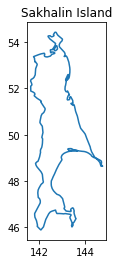

In [26]:
from pylab import *
plot(contour_sakhalin[:,0], contour_sakhalin[:,1])
gca().set_aspect('equal')
title('Sakhalin Island')
show()

The contour of the shapefile -- a coastline -- consists of 835 points.

In [27]:
contour_sakhalin.shape

(835, 2)

Bounding box of the shapefile is easily accessible from shapefile specification

In [28]:
sakhalin_shp.bbox

[141.63803100585938, 45.88860321044922, 144.75164794921875, 54.424713134765625]

Lets build a search url, according to the previous steps:

In [29]:
query_sakhalin_bbox = tuple(zip(['lonl', 'latl', 'lonu', 'latu'], map(str, sakhalin_shp.bbox)))
print(query_sakhalin_bbox)

(('lonl', '141.63803100585938'), ('latl', '45.88860321044922'), ('lonu', '144.75164794921875'), ('latu', '54.424713134765625'))


In [30]:
within_sakhalin_request_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), query_sakhalin_bbox))

In [31]:
within_sakhalin_request_url  #it is good to inspect an url before sending a request

'http://botsad.ru/hitem/json/?lonl=141.63803100585938&latl=45.88860321044922&lonu=144.75164794921875&latu=54.424713134765625'

Getting data within Sakhalin Island bounding box:

In [32]:
server_response = urlopen(within_sakhalin_request_url)
sakhalin_data_in_bbox = pd.DataFrame(json.loads(server_response.read().decode('utf-8'))['data'])

Next step assumes applying a fine filtering with the help of the `Polygon` class instance:

In [33]:
from shapely.geometry import Polygon, Point
closed_sakhalin_contour = np.vstack([contour_sakhalin, contour_sakhalin[-1]]) # Polygon should be closed to check inclusions
sakhalin_poly = Polygon(closed_sakhalin_contour)

In [34]:
sakhalin_filtered = sakhalin_data_in_bbox[[sakhalin_poly.contains(Point(x,y)) for x,y in zip(sakhalin_data_in_bbox.longitude, sakhalin_data_in_bbox.latitude)]]

In [35]:
sakhalin_filtered

,acronym,additionals,altitude,branch,collection_finished,collection_started,collectors,country,country_id,created,...,note,region,short_note,significance,species_authorship,species_epithet,species_fullname,species_id,species_status,updated
0,VBGI,[],792,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,F.Schmidt,ssiori,Prunus ssiori F.Schmidt,506834,From plantlist,2017-06-13
1,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,Nakai,axillare,Vaccinium axillare Nakai,225901,From plantlist,2017-06-13
2,VBGI,[],792,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,F.Schmidt,rugosa,Ilex rugosa F.Schmidt,44334,From plantlist,2017-06-13
3,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,(Koidz.) H.Ohba,nipponica,Cerasus nipponica (Koidz.) H.Ohba,499916,From plantlist,2017-06-13
4,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,(Cham. & Schltdl.) M.Roem.,sambucifolia,Sorbus sambucifolia (Cham. & Schltdl.) M.Roem.,518523,From plantlist,2017-06-13
5,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,A.Gray,smallii,Vaccinium smallii A.Gray,226494,From plantlist,2017-06-13
6,VBGI,[],792,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,Jancz.,latifolium,Ribes latifolium Jancz.,251865,From plantlist,2017-06-13
7,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,Hult‚n,beauverdiana,Spiraea beauverdiana Hult‚n,518694,From plantlist,2017-06-13
8,VBGI,[],192,,,2016-09-29,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,Cham.,ermanii,Betula ermanii Cham.,68288,From plantlist,2017-06-13
9,VBGI,[],192,,,2016-09-29,Пименова Е.А.,Russia,162,2017-01-16,...,,Сахалинская обл.,,,Cham.,ermanii,Betula ermanii Cham.,68288,From plantlist,2017-06-13


In [36]:
sakhalin_data_in_bbox.shape

(574, 41)

Now, we will find ID's of the points belonging to the bounding box of Sakhalin Island, but not to its countour (coastline)  defined in the shapefile.

In [37]:
set(sakhalin_data_in_bbox.id.values) - set(sakhalin_filtered.id.values)

{1403,
 1412,
 1432,
 1434,
 1438,
 1439,
 1529,
 10015,
 10016,
 10373,
 19819,
 19820,
 19823,
 19912,
 20830,
 20832,
 30563,
 31010,
 31032,
 31079,
 31080,
 31152,
 31153,
 31154,
 31161}

Inspecting positions of the filtered points, e.g. ID=1412 (see http://botsad.ru/hitem/1412), one can conclude
that all filtered records were collected near the coastline; this is probably caused by errors in herbarium records and coastline points positioning.So, that isn't a true error, but such cases should be taken into account when do filtering by polygonal areas.

Lets find herbarium records collected in the proximity of Petropavlovsk-Kamchatsky city.
Firstly, we set coordinates of the center of Petropavlovsk-Kamchatsky city and define a bounding box that includes 200-km circle around this point:

In [38]:
kamchatka_bbox = [151.1, 47.8, 172.0, 58.3]
petropavlovsk_coords = (53.145992, 158.683548)

The Earth shape isn't a prefect sphere, so we need an additional tool that provides a function to get estimation of distances between geographically distributed points.
`Geopy` package provides necessary functionality to do distance computation.

In [39]:
from geopy.distance import vincenty
query_kamchatka_bbox = tuple(zip(['lonl', 'latl', 'lonu', 'latu'], map(str, kamchatka_bbox)))
near_petropavlovsk_kamchatsky_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), query_kamchatka_bbox))
server_response = urlopen(near_petropavlovsk_kamchatsky_url)
petropavlovsk_data_in_bbox = pd.DataFrame(json.loads(server_response.read().decode('utf-8'))['data'])
petropavlovsk_data_in_bbox.shape

(306, 41)

In [40]:
petropavlovsk_filtered = petropavlovsk_data_in_bbox[[vincenty((lat, lon), petropavlovsk_coords).km < 200.0 for lat,lon in zip(petropavlovsk_data_in_bbox.latitude, petropavlovsk_data_in_bbox.longitude)]]

In [41]:
petropavlovsk_filtered.shape

(146, 41)

When the datasets are obtained, we can carry out some investigations (e.g. comparison analysis):

In [42]:
print('The number of unique genera in 200 km circle around the Petropavlovsk-Kamchatsky city:', len(petropavlovsk_filtered.genus.unique()))

The number of unique genera in 200 km circle around the Petropavlovsk-Kamchatsky city: 64


In [43]:
print('The number of unique species in 200-km circle around the Petropavlovsk-Kamchatsky city:', len(petropavlovsk_filtered.species_id.unique()))

The number of unique species in 200-km circle around the Petropavlovsk-Kamchatsky city: 78


In [44]:
print('The number of unique genera at Sakhalin Island:', len(sakhalin_filtered.species_id.unique()))

The number of unique genera at Sakhalin Island: 211


In [45]:
print('The number of unique species at Sakhalin Island:', len(sakhalin_filtered.genus.unique()))

The number of unique species at Sakhalin Island: 136


Let's count frequencies:

In [46]:
from collections import Counter

Genera frequencies near the Petropavlovsk-Kamchatsky city

In [47]:
petropavlovsk_freq = petropavlovsk_filtered.genus.value_counts() / len(petropavlovsk_filtered)
petropavlovsk_freq

Riccardia          0.061644
Aneura             0.061644
Dryopteris         0.047945
Moerckia           0.047945
Peltolepis         0.041096
Botrychium         0.041096
Nardia             0.041096
Conocephalum       0.034247
Gymnocarpium       0.027397
Calycularia        0.027397
Pellia             0.027397
Cystopteris        0.020548
Calamagrostis      0.020548
Lunathyrium        0.020548
Polystichum        0.020548
Preissia           0.020548
Sauteria           0.020548
Athyrium           0.020548
Phegopteris        0.020548
Marchantia         0.020548
Agrostis           0.013699
Cryptogramma       0.013699
Stellaria          0.013699
Blasia             0.013699
Draba              0.013699
Euphrasia          0.013699
Oreopteris         0.013699
Salix              0.013699
Saxifraga          0.006849
Gentianella        0.006849
                     ...   
Lophozia           0.006849
Papaver            0.006849
Huperzia           0.006849
Abies              0.006849
Andromeda          0

Genera frequencies at Sakhalin Island:

In [48]:
sakhalin_freq = sakhalin_filtered.genus.value_counts() / len(sakhalin_filtered)
sakhalin_freq

Porella           0.071038
Riccardia         0.040073
Conocephalum      0.038251
Dryopteris        0.030965
Gymnocarpium      0.027322
Jungermannia      0.025501
Preissia          0.023679
Scapania          0.023679
Lophozia          0.023679
Peltolepis        0.021858
Leptorumohra      0.021858
Asarum            0.021858
Marchantia        0.020036
Nardia            0.020036
Mesoptychia       0.020036
Cephalozia        0.018215
Calypogeia        0.018215
Frullania         0.016393
Blepharostoma     0.016393
Phegopteris       0.014572
Botrychium        0.014572
Sauteria          0.014572
Mylia             0.014572
Sphenolobus       0.012750
Lejeunea          0.012750
Woodsia           0.010929
Orthocaulis       0.010929
Pellia            0.010929
Leiocolea         0.010929
Reboulia          0.009107
                    ...   
Primula           0.001821
Vitis             0.001821
Brylkinia         0.001821
Fritillaria       0.001821
Larix             0.001821
Pteridium         0.001821
S

Shannon's informational measures:

In [49]:
shannon_sakhalin = - sum(np.log2(sakhalin_freq.values) * sakhalin_freq.values)
shannon_sakhalin

6.3251019029259146

In [50]:
shannon_petropavlovsk = - sum(np.log2(petropavlovsk_freq.values) * petropavlovsk_freq.values)
shannon_petropavlovsk

5.564519271608396

Relative values of informational measures (relative to its theoretically maximal value):

In [51]:
shannon_sakhalin_relative = shannon_sakhalin / np.log2(len(sakhalin_freq))
shannon_sakhalin_relative

0.89243528249808335

In [52]:
shannon_petropavlovsk_relative = shannon_petropavlovsk / np.log2(len(petropavlovsk_freq))
shannon_petropavlovsk_relative

0.92741987860139929

**Note:** One can be confused looking at the results: genus diversity near the Petropavlovsk-Kamchatsky city is greater than on Sakhalin Island; this could be caused by lots of impacts -- such as Herbarium database filling peculiarities (the database filling is still in progress...) and just by a statistical ambiguity; records in the database are collected in a non-random and/or non-regular way that, in turn, may lead to fake conclusions. So, be careful making any conclusions... 

In [53]:
import datetime
print("Date of last code execution: ", datetime.datetime.now())

Date of last code execution:  2017-11-12 11:31:02.205075
